In [24]:
#Import statements
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.express as px

# Read data, then set the index to be the date
# NOTE: make the file a single line!!
data = pd.read_csv("https://github.com/dustywhite7/econ8310-assignment1/raw/main/assignment_data_train.csv")

In [25]:
data

,Timestamp,year,month,day,hour,trips
0,2018-01-01 00:00:00,2018,1,1,0,16714
1,2018-01-01 01:00:00,2018,1,1,1,19041
2,2018-01-01 02:00:00,2018,1,1,2,16590
3,2018-01-01 03:00:00,2018,1,1,3,12626
4,2018-01-01 04:00:00,2018,1,1,4,8739
...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,2018,12,31,19,14876
8756,2018-12-31 20:00:00,2018,12,31,20,14434
8757,2018-12-31 21:00:00,2018,12,31,21,14116
8758,2018-12-31 22:00:00,2018,12,31,22,10729


In [26]:
data['datetime'] = pd.to_datetime(data['Timestamp'], 
	format='%Y-%m-%d %H:%M:%S')
data.set_index(pd.DatetimeIndex(data['Timestamp']), 
	inplace=True)

In [5]:
# Plot the data
px.line(data, x='Timestamp', y='trips',
       labels = {
           'datetime' : 'Date',
           'logpm' : 'Logged Pollution Level'
       })

In [27]:
data

,Timestamp,year,month,day,hour,trips,datetime
Timestamp,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,2018,1,1,0,16714,2018-01-01 00:00:00
2018-01-01 01:00:00,2018-01-01 01:00:00,2018,1,1,1,19041,2018-01-01 01:00:00
2018-01-01 02:00:00,2018-01-01 02:00:00,2018,1,1,2,16590,2018-01-01 02:00:00
2018-01-01 03:00:00,2018-01-01 03:00:00,2018,1,1,3,12626,2018-01-01 03:00:00
2018-01-01 04:00:00,2018-01-01 04:00:00,2018,1,1,4,8739,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2018-12-31 19:00:00,2018,12,31,19,14876,2018-12-31 19:00:00
2018-12-31 20:00:00,2018-12-31 20:00:00,2018,12,31,20,14434,2018-12-31 20:00:00
2018-12-31 21:00:00,2018-12-31 21:00:00,2018,12,31,21,14116,2018-12-31 21:00:00


In [28]:
data2 = data[['Timestamp','trips']]
data2.columns = ['ds','y']

In [29]:
# Initialize Prophet instance and fit to data

model = Prophet(changepoint_prior_scale=0.5, daily_seasonality = True )
# Higher prior values will tend toward overfitting
#     Lower values will tend toward underfitting

modelFit = model.fit(data2)

21:27:20 - cmdstanpy - INFO - Chain [1] start processing
21:27:22 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Create timeline for 1 year in future, 
#   then generate predictions based on that timeline

future = modelFit.make_future_dataframe(periods=744, freq =' H')
pred = modelFit.predict(future)

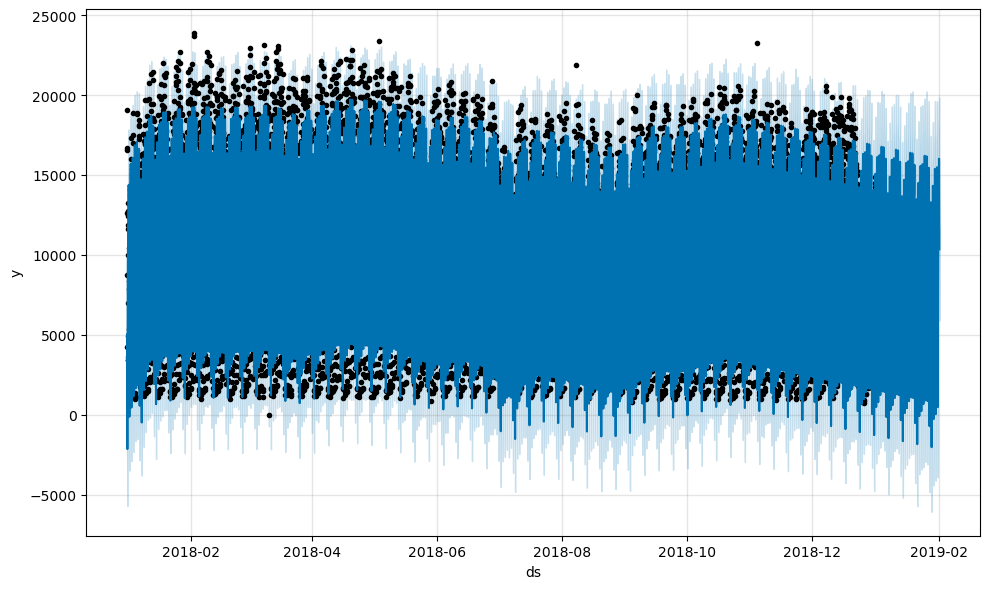

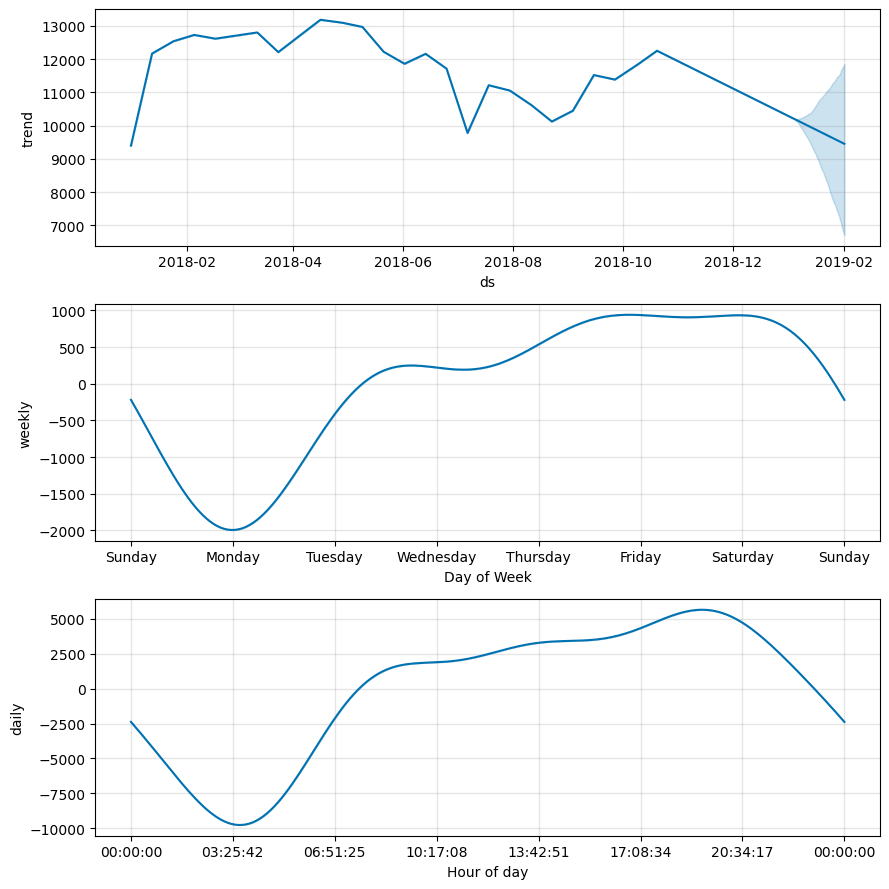

In [31]:
# Create plots of forecast and truth, 
#   as well as component breakdowns of the trends

plt = modelFit.plot(pred)
plt.savefig("prophet.png")

comp = modelFit.plot_components(pred)

In [36]:
pred = pred[['yhat']]
pred = pred[-744:]